# Assignment 2
In this assignment, we will use a multi-layer perceptron network to build an image classifier for single digits. We will be using a public dataset for model development. The dataset we will be using is the MNIST digit dataset. The dataset contains 10 classes, where class `i` contains images of digit `i`.

In [70]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import random
from torch import nn, optim
from collections import Counter
from matplotlib import pyplot as plt
import torch.nn.functional as F


####1. Create train_data and test_dataset objects using the MNIST digit dataset from torchvision.datasets module. (5 points)

In [54]:
transform = transforms.Compose([transforms.ToTensor()])
train_data = torchvision.datasets.MNIST('./data', train = True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('./data', train = False, download=True,transform=transform)

####2. Use the [random_split](https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split) method to split the `train_data` into `train_dataset` (50000 images) and `validation_dataset` dataset (10000 images). (5 points)

In [55]:
splitter = random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(42))
train_dataset = splitter[0]
validation_dataset = splitter[1]

In [56]:
def visualize(image, label):
  plt.figure()
  plt.imshow(image, cmap='gray')
  plt.title(str(label))
  plt.xticks([])
  plt.yticks([])

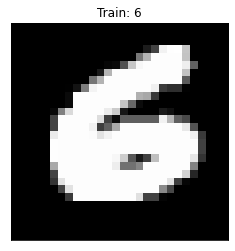

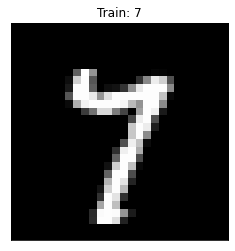

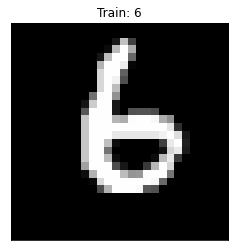

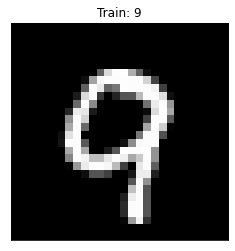

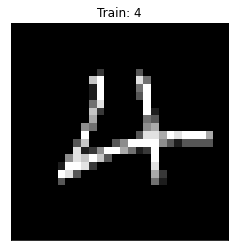

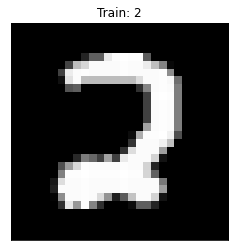

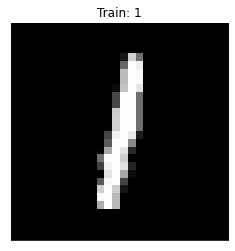

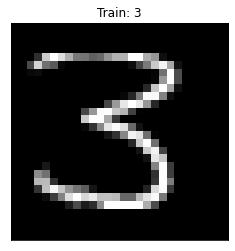

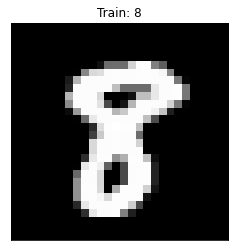

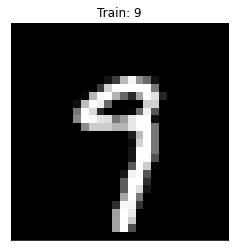

In [57]:
train_examples = [train_dataset[i] for i in range(10)]
for image, label in train_examples:
  visualize(image.numpy()[0], f'Train: {label}')

#### 3. Create dataloader objects for `train_dataset`, `validation_dataset`, and `test_dataset`. (5 points)

In [58]:
batch_size = 32
trainLoader = DataLoader(train_dataset, batch_size, shuffle=True)
validationLoader = DataLoader(validation_dataset, batch_size, shuffle=True)
testLoader = DataLoader(test_dataset, batch_size, shuffle=True)

#### 4. Develop an MLP model for classifying MNIST images. The developed model should have four hidden layers of 256, 128, 64, and 32 neurons. Each hidden layer should be followed with a ReLU unit and a Dropout layer (p=0.2).  (15 points)

In [59]:
model  = nn.Sequential(
    nn.Flatten(),
    
    nn.Linear(28*28, 256, bias=True),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(256, 128, bias=True),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(128, 64, bias=True),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(64, 32, bias=True),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(32, 10, bias=True),
    
)

#### 5. Define the components needed for training a deep learning model. (10 points)



In [60]:
training_labels  = [train_dataset[i][1] for i in range(len(train_dataset))]
set(training_labels)

test_labels = [test_dataset[i][1] for i in range(len(test_dataset))]
set(test_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [61]:
Counter(training_labels)

Counter({6: 4933,
         7: 5204,
         9: 4985,
         4: 4863,
         2: 4958,
         1: 5613,
         3: 5093,
         8: 4882,
         0: 4923,
         5: 4546})

In [62]:
Counter(test_labels)

Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

In [63]:
train_image_sizes = [train_dataset[i][0].shape for i in range(len(train_dataset))]
set(train_image_sizes)

{torch.Size([1, 28, 28])}

In [64]:
test_image_sizes = [test_dataset[i][0].shape for i in range(len(test_dataset))]
set(test_image_sizes)

{torch.Size([1, 28, 28])}

In [65]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu");
model = model.to(device)

#### 6. Write the training loop and train the model for 100 epochs. Print the training and validation accuracy and loss for each epoch. (35 points)

In [66]:
model.train()
epochs = 100
for epoch in range(epochs):
  total_loss = 0
  total  = 0
  correct = 0
  for batch_index, (images, labels) in enumerate(trainLoader):
    optimizer.zero_grad()
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()# We missed this in the class, i.e. we missed to update the weights (no learning can happen)
    total_loss += loss.item() * images.size(0)
    total += images.size(0)
    _, preds = torch.max(outputs, 1)
    correct += (preds == labels).sum().item()
    if batch_index % 10 == 0:
      accuracy = correct / total
      loss = total_loss / total
      print(f'{epoch} Accuracy={accuracy},  Loss= {loss}')

Streaming output truncated to the last 5000 lines.
68 Accuracy=0.9961099585062241,  Loss= 0.01316556147939312
68 Accuracy=0.9962649402390438,  Loss= 0.012914169216826966
68 Accuracy=0.9961685823754789,  Loss= 0.01321074160727695
68 Accuracy=0.996079335793358,  Loss= 0.013200740924061245
68 Accuracy=0.9959964412811388,  Loss= 0.01397012302888852
68 Accuracy=0.9961340206185567,  Loss= 0.013641963732762755
68 Accuracy=0.9959509966777409,  Loss= 0.01423206532470044
68 Accuracy=0.9956792604501608,  Loss= 0.014722236010353282
68 Accuracy=0.9955218068535826,  Loss= 0.015502523722511017
68 Accuracy=0.9954682779456193,  Loss= 0.015371588632340751
68 Accuracy=0.9956011730205279,  Loss= 0.015133793341452404
68 Accuracy=0.9956374643874644,  Loss= 0.014824928736047734
68 Accuracy=0.9955851800554016,  Loss= 0.014741553571742382
68 Accuracy=0.9955357142857143,  Loss= 0.014630930795086984
68 Accuracy=0.9955708661417323,  Loss= 0.01459732743684654
68 Accuracy=0.9955242966751918,  Loss= 0.01481923791444

The printed output for this question was 1000's of lines long so I can't save it here, however, the last 10 lines were as follows:

99 Accuracy=0.99681339225017,  Loss= 0.01009041864076065

99 Accuracy=0.9967927076299797,  Loss= 0.010088087989919163

99 Accuracy=0.9968142186452046,  Loss= 0.010040130086281733

99 Accuracy=0.9968146235842772,  Loss= 0.010028229887049477

99 Accuracy=0.9967943414956982,  Loss= 0.010061325351593235

99 Accuracy=0.9968154174884944,  Loss= 0.010024445905000972

99 Accuracy=0.9968362181580667,  Loss= 0.00996327452872067

99 Accuracy=0.9968161907852044,  Loss= 0.010003889772377336

99 Accuracy=0.9968367182462927,  Loss= 0.009957489129493586

99 Accuracy=0.9968369634849455,  Loss= 0.00994454012245007


####6. Test the model using the `test_dataset`, and report accuracy and loss. (10 points)

In [87]:
def test():
  model.eval()
  testLoss = 0
  correct = 0
  with torch.no_grad():
    for batch_index, (image, label) in enumerate(testLoader):
      images = image.to(device)
      labels = label.to(device)
      output = model(image)
      loss = criterion(output, labels)
      testLoss += loss.item() * images.size(0)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(label.data.view_as(pred)).sum()
    testLoss = testLoss/len(testLoader.dataset)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    testLoss, correct, len(testLoader.dataset),
    100. * correct / len(testLoader.dataset)))

test()


Test set: Avg. loss: 0.1087, Accuracy: 9817/10000 (98%)



Test set: Avg. loss: 0.1087, Accuracy: 9817/10000 (98%)

#### 8. We would like to see how accurate the trained model is when applied to a set of images of digits with slight differences. The image of a digit in the MNIST dataset has a black background (0 value for pixel values). This might be like writing with white chalk on a blackboard. We make slight changes in the test datasets by applying a simple change `image = 1 - image`. In other words, we invert the pixel intensity values. The resulting images resemble a digit written with a black marker on a whiteboard. Test the model using the updated test_dataset, and report your observations regarding model performance. How would you change your pipeline if you redo this experiment? (15 points)

In [89]:
def modifiedTest():
  model.eval()
  testLoss = 0
  correct = 0
  with torch.no_grad():
    for batch_index, (image, label) in enumerate(testLoader):
      image = 1 - image #the change
      images = image.to(device)
      labels = label.to(device)
      output = model(image)
      loss = criterion(output, labels)
      testLoss += loss.item() * images.size(0)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(label.data.view_as(pred)).sum()
    testLoss = testLoss/len(testLoader.dataset)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    testLoss, correct, len(testLoader.dataset),
    100. * correct / len(testLoader.dataset)))

modifiedTest()


Test set: Avg. loss: 8.5481, Accuracy: 713/10000 (7%)



output: Test set: Avg. loss: 8.5481, Accuracy: 713/10000 (7%)

After inverting the colours of the image, accuracy dropped to just 7% down from 98% in the trained model. This could be rectified by adding transformations to the model training pipeline that takes the input pixels and inverts their value during the training process. Such a transformation could be applied with a 50% probability to all training images, and the resultant model would be able to distinguish between inverted and non-inverted 28x28 images of handwritten numbers.